In [1]:
!pip install -U fortran-magic==0.8 ipython==7.34.0 numpy==1.25.2 setuptools==67.7.2

In [2]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 35 µs, sys: 0 ns, total: 35 µs
Wall time: 38.9 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.158
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.31
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul2(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time

matmul2(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul3(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if  len(A[0]) == len(B):
      for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
      return out
    else:
      return 'error'

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul3(a, b)

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 15.5 µs


'error'

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
first=[1,2,3],[4,5,6],[7,8,9]
second = [3,6,9],[12,24,36],[110,200,300]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
m=matmul2(first,second)
print(m)

[[357, 654, 981], [732, 1344, 2016], [1107, 2034, 3051]]


In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

0.055039972748589946

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9835490828135293, 0.784911084488373, 0.6506919951214988],
 [0.01914286089779571, 0.651750664080718, 0.378518844971092]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
import numpy as np
times=[]
for i in range(10):
  st=time.process_time()
  randa=random_matrix(600,100)
  randb=random_matrix(100,600)
  matmul3(randa,randb)
  et=time.process_time()
  times.append(et-st)
print(np.mean(times))

5.7307388306


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd
mean_time = np.mean(times)
data_frame = pd.DataFrame()
data_frame['Average time'] = None
data_frame.loc['Python'] = mean_time
print(data_frame)


        Average time
Python      5.730739


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import numpy as np
import time

randa_np = np.array(randa)
randb_np = np.array(randb)

execution_times_np = []
for _ in range(10):
    start_time = time.time()
    np.dot(randa_np, randb_np)
    end_time = time.time()
    execution_times_np.append(end_time - start_time)

average_execution_time_np = sum(execution_times_np) / len(execution_times_np)
average_execution_time_np

0.002998042106628418

In [ ]:
data_frame.loc['Numpy'] = average_execution_time_np
print(data_frame)

        Average time
Python      5.730739
Numpy       0.002998


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.41 s, sys: 15.9 ms, total: 5.42 s
Wall time: 5.42 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 6.38 ms, sys: 0 ns, total: 6.38 ms
Wall time: 6.27 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 197 µs, sys: 3 µs, total: 200 µs
Wall time: 207 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = np.array([[6, 1], [0, 5]])
B = np.array([[9, 4], [3, 7]])
print(A)
print(B)

[[6 1]
 [0 5]]
[[9 4]
 [3 7]]


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine matmul(A, B, C, n, m, p)
    implicit none
    integer, intent(in) :: n, m, p
    double precision, intent(in) :: A(n, m)
    double precision, intent(in) :: B(m, p)
    double precision, intent(out) :: C(n, p)
    integer :: i, j, k

    ! Inicializar la matriz de salida
    C = 0.0d0

    do i = 1, n
        do j = 1, p
            do k = 1, m
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine matmul


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
C = matmul(A,B)

print("Matrix A =")
print(A)
print("Matrix B = ")
print(B)
print("Matrix C = ")
print(C)

Matrix A =
[[6 1]
 [0 5]]
Matrix B = 
[[9 4]
 [3 7]]
Matrix C = 
[[57. 31.]
 [15. 35.]]


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
module matrix_utils
    implicit none
contains

    subroutine random_matrix(A, n, m)
        integer, intent(in) :: n, m
        double precision, intent(out) :: A(n, m)
        integer :: i, j
        call random_seed()
        do i = 1, n
            do j = 1, m
                call random_number(A(i,j))
            end do
        end do
    end subroutine random_matrix

    subroutine matmul3(A, B, C, n, m, p)
        integer, intent(in) :: n, m, p
        double precision, intent(in) :: A(n, m), B(m, p)
        double precision, intent(out) :: C(n, p)
        integer :: i, j, k

        C = 0.0d0
        do i = 1, n
            do j = 1, p
                do k = 1, m
                    C(i, j) = C(i, j) + A(i, k) * B(k, j)
                end do
            end do
        end do
    end subroutine matmul3

end module matrix_utils


The extension _fortran_magic_9a76a626121b71c0db74a6dec0c9d72d is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time

A = np.random.rand(600, 100)
B = np.random.rand(100, 600)
C = matmul(A, B)

print("Matrix A =")
print(A[:5, :5])
print("Matrix B = ")
print(B[:5, :5])
print("Matrix C = ")
print(C[:5, :5])

Matrix A =
[[0.11917738 0.35939164 0.76178419 0.73697314 0.59315435]
 [0.09545386 0.89580307 0.47366597 0.54729432 0.01339809]
 [0.5899431  0.16351935 0.57736435 0.6804254  0.16495141]
 [0.59385715 0.73282635 0.35887569 0.20280808 0.33987974]
 [0.54509582 0.57910976 0.92866377 0.9402046  0.93541214]]
Matrix B = 
[[0.76803776 0.4120634  0.34071165 0.76867767 0.39234095]
 [0.78879038 0.31815619 0.72410416 0.76733947 0.9037296 ]
 [0.62175758 0.49514757 0.1173018  0.63912879 0.68302153]
 [0.25067733 0.14142973 0.01554112 0.72003784 0.08000067]
 [0.06727039 0.24965842 0.8427344  0.55679763 0.25984912]]
Matrix C = 
[[27.62077876 26.33519543 27.25403328 26.68973195 25.93359641]
 [22.57718224 22.89932281 23.07584493 22.3216315  21.42514485]
 [26.20577975 24.27936223 24.86467546 23.78506279 23.54401   ]
 [25.48353866 26.73959522 27.58293716 26.25476725 26.03396718]
 [26.96382133 25.56996998 26.94273733 25.66398085 24.75960609]]
CPU times: user 48.3 ms, sys: 2.97 ms, total: 51.2 ms
Wall time: 50

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
%%fortran
subroutine matmul(A,B,C)
  implicit none
  real, intent(in) :: A(600,100), B(100,600)
  real, intent(out) :: C(600,600)
  integer :: i, j, k

  C = 0.0

  do i=1,size(A,1)
    do j=1,size(B,2)
      do k=1,size(B,1)
        C(i,j) = C(i,j) + A(i,k)*B(k,j)
      end do
    end do
  end do

end subroutine matmul

In [ ]:
n, m = 600, 100
A = np.random.rand(n, m)
B = np.random.rand(m, n)

times = []
for i in range(10):
    result = %timeit -r 1 -o -q matmul(A, B)
    times.append(result.best)

avg_time = np.mean(times)
print(avg_time)

0.04759960245999877


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmulX10.f90

program matmulX10

implicit none

integer, parameter :: n = 600, m = 100
real*8 :: A(n,m), B(m,n), C(n,n)
integer :: i, j, k

call random_number(A)
call random_number(B)

do i = 1, 10
  C = 0.0
  do j = 1, n
    do k = 1, m
      C(j,:) = C(j,:) + A(j,k) * B(k,:)
    end do
  end do
end do


end program matmulX10

Writing matmulX10.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran -o matmulX10 matmulX10.f90

In [ ]:
!./matmulX10

**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
data_frame.loc['Fortran'] = avg_time
print(data_frame)

         Average time
Python       5.730739
Numpy        0.002998
Fortran      0.047600


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrixc.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define ROW_A 600
#define COL_A 100
#define ROW_B 100
#define COL_B 600
#define ITERATIONS 10

void random_matrix(double* matrix, int rows, int cols) {
    for (int i = 0; i < rows * cols; i++) {
        matrix[i] = (double)rand() / RAND_MAX;
    }
}

void matmul3(double* A, double* B, double* C, int rowA, int colA, int colB) {
    for (int i = 0; i < rowA; i++) {
        for (int j = 0; j < colB; j++) {
            double sum = 0.0;
            for (int k = 0; k < colA; k++) {
                sum += A[i * colA + k] * B[k * colB + j];
            }
            C[i * colB + j] = sum;
        }
    }
}

int main() {
    srand(time(NULL));

    double times[ITERATIONS];
    for (int iter = 0; iter < ITERATIONS; iter++) {
        double* A = malloc(sizeof(double) * ROW_A * COL_A);
        double* B = malloc(sizeof(double) * ROW_B * COL_B);
        double* C = malloc(sizeof(double) * ROW_A * COL_B);

        random_matrix(A, ROW_A, COL_A);
        random_matrix(B, ROW_B, COL_B);

        clock_t start = clock();
        matmul3(A, B, C, ROW_A, COL_A, COL_B);
        clock_t end = clock();

        times[iter] = (double)(end - start) / CLOCKS_PER_SEC;

        free(A);
        free(B);
        free(C);
    }

    double avg = 0.0;
    for (int i = 0; i < ITERATIONS; i++) {
        avg += times[i];
    }
    avg /= ITERATIONS;

    printf("Average time: %f seconds\n", avg);
    return 0;
}


Writing matrixc.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc -o matrixc matrixc.c

In [ ]:
!./matrixc

Average time: 0.199162 seconds


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
import subprocess
import re

output = subprocess.check_output('./matrixc')

C_avgtime = output.decode('utf-8')


match = re.search(r"([0-9.]+)", C_avgtime)
if match:
    C_avgtime_double = float(match.group(1))
    print(C_avgtime_double)



0.146253


In [ ]:
data_frame.loc['C'] = C_avgtime_double
print(data_frame)

         Average time
Python       5.730739
Numpy        0.002998
Fortran      0.047600
C            0.146253


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrixc.cpp
#include <iostream>
#include <vector>
#include <chrono>
#include <cstdlib>

#define ROW_A 600
#define COL_A 100
#define ROW_B 100
#define COL_B 600
#define ITERATIONS 10

void random_matrix(std::vector<double>& matrix, int rows, int cols) {
    for (int i = 0; i < rows * cols; ++i) {
        matrix[i] = static_cast<double>(rand()) / RAND_MAX;
    }
}

void matmul3(const std::vector<double>& A, const std::vector<double>& B, std::vector<double>& C,
             int rowA, int colA, int colB) {
    for (int i = 0; i < rowA; ++i) {
        for (int j = 0; j < colB; ++j) {
            double sum = 0.0;
            for (int k = 0; k < colA; ++k) {
                sum += A[i * colA + k] * B[k * colB + j];
            }
            C[i * colB + j] = sum;
        }
    }
}

int main() {
    srand(static_cast<unsigned int>(time(nullptr)));

    double total_time = 0.0;

    for (int iter = 0; iter < ITERATIONS; ++iter) {
        std::vector<double> A(ROW_A * COL_A);
        std::vector<double> B(ROW_B * COL_B);
        std::vector<double> C(ROW_A * COL_B);

        random_matrix(A, ROW_A, COL_A);
        random_matrix(B, ROW_B, COL_B);

        auto start = std::chrono::high_resolution_clock::now();
        matmul3(A, B, C, ROW_A, COL_A, COL_B);
        auto end = std::chrono::high_resolution_clock::now();

        std::chrono::duration<double> elapsed = end - start;
        total_time += elapsed.count();
    }

    double avg = total_time / ITERATIONS;

    std::cout << "Average time: " << avg << " seconds" << std::endl;

    return 0;
}


Writing matrixc.cpp


In [ ]:
!g++ -o matrixc matrixc.cpp

In [ ]:
!./matrixc

Average time: 0.300363 seconds


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import subprocess

output = subprocess.check_output('./matrixc')

Cpp_avgtime = output.decode('utf-8')

match = re.search(r"([0-9.]+)", Cpp_avgtime)
if match:
    Cpp_avgtime_double = float(match.group(1))
    print(Cpp_avgtime_double)



0.297018


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
data_frame.loc['C++'] = Cpp_avgtime_double
print(data_frame)

         Average time
Python       5.730739
Numpy        0.002998
Fortran      0.047600
C            0.146253
C++          0.297018


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrixj.java
import java.util.Random;

public class matrixj {
    public static void main(String[] args) {
        int[][] A = new int[600][100];
        int[][] B = new int[100][600];
        Random random = new Random();
        for (int i = 0; i < A.length; i++) {
            for (int j = 0; j < A[0].length; j++) {
                A[i][j] = random.nextInt(100);
            }
        }
        for (int i = 0; i < B.length; i++) {
            for (int j = 0; j < B[0].length; j++) {
                B[i][j] = random.nextInt(100);
            }
        }

        long totalTime = 0;
        for (int i = 0; i < 10; i++) {
            long startTime = System.currentTimeMillis();
            int[][] C = multiplyMatrices(A, B);
            long endTime = System.currentTimeMillis();
            totalTime += (endTime - startTime);
        }
        double averageTime = totalTime / 10.0;

        System.out.print(averageTime / 1000.0);

    }

    public static int[][] multiplyMatrices(int[][] A, int[][] B) {
        int m1 = A.length;
        int n1 = A[0].length;
        int m2 = B.length;
        int n2 = B[0].length;
        if (n1 != m2) {
            throw new IllegalArgumentException("The number of columns of the first matrix must match the number of rows of the second matrix");
        }
        int[][] C = new int[m1][n2];
        for (int i = 0; i < m1; i++) {
            for (int j = 0; j < n2; j++) {
                int sum = 0;
                for (int k = 0; k < n1; k++) {
                    sum += A[i][k] * B[k][j];
                }
                C[i][j] = sum;
            }
        }
        return C;
    }
}

Writing matrixj.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac matrixj.java

In [ ]:
!java matrixj

0.060200000000000004

**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
import subprocess

command = ['java', 'matrixj']
output_bytes = subprocess.check_output(command)

java_avgtime = output_bytes.decode('utf-8')

java_avgtime_float = float(java_avgtime)

print(java_avgtime_float)

0.0625


In [ ]:
data_frame.loc['Java'] = java_avgtime_float
print(data_frame)

         Average time
Python       5.730739
Numpy        0.002998
Fortran      0.047600
C            0.146253
C++          0.297018
Java         0.062500


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix.js
function multiplyMatrices(matrixA, matrixB) {
  const rowsA = matrixA.length;
  const colsA = matrixA[0].length;
  const rowsB = matrixB.length;
  const colsB = matrixB[0].length;
  const resultMatrix = [];

  if (colsA !== rowsB) {
    return false;
  }

  for (let i = 0; i < rowsA; i++) {
    resultMatrix[i] = [];
    for (let k = 0; k < colsB; k++) {
      let sum = 0;
      for (let j = 0; j < rowsB; j++) {
        sum += matrixA[i][j] * matrixB[j][k];
      }
      resultMatrix[i][k] = sum;
    }
  }

  return resultMatrix;
}

function createMatrix(rows, cols) {
  const matrix = [];
  for (let i = 0; i < rows; i++) {
    matrix[i] = Array(cols).fill(0).map(() => Math.floor(Math.random() * 10));
  }
  return matrix;
}
async function computeAverageTime(n) {
  const matrixA = createMatrix(600, 100);
  const matrixB = createMatrix(100, 600);
  const startTime = performance.now();
  for (let i = 0; i < n; i++) {
    multiplyMatrices(matrixA, matrixB);
  }
  const endTime = performance.now();
  return (endTime - startTime) / n / 1000;
}

(async () => {
  const averageTime = await computeAverageTime(10);
  console.log("Average time per multiplication (s):", averageTime.toFixed(6));
})();



Writing matrix.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node matrix.js

Average time per multiplication (s): 0.267145


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
data_frame.loc['Javascript'] =  0.267145
print(data_frame)

            Average time
Python          5.730739
Numpy           0.002998
Fortran         0.047600
C               0.146253
C++             0.297018
Java            0.062500
Javascript      0.267145


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min = data_frame['Average time'].min()
min_label = data_frame[data_frame['Average time'] == min].index[0]
print("Minimum value is {} {}".format(min, min_label))

Minimum value is 0.002998042106628418 Numpy


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
import pandas as pd

max_time = data_frame["Average time"].max()
data_frame["Speed factor"] = max_time / data_frame["Average time"]

print(data_frame)


            Average time  Speed factor
Python          5.730739      1.000000
Numpy           0.002998   1911.493777
Fortran         0.047600    120.394678
C               0.146253     39.183735
C++             0.297018     19.294248
Java            0.062500     91.691821
Javascript      0.267145     21.451791


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
data = data_frame.sort_values(by="Average time", ascending=True)
print(data)

            Average time  Speed factor
Numpy           0.002998   1911.493777
Fortran         0.047600    120.394678
Java            0.062500     91.691821
C               0.146253     39.183735
Javascript      0.267145     21.451791
C++             0.297018     19.294248
Python          5.730739      1.000000


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  0           0 RESUME                   0

  1           2 LOAD_NAME                0 (a)
              4 LOAD_NAME                1 (b)
              6 LOAD_NAME                2 (c)
              8 BINARY_OP                5 (*)
             12 BINARY_OP                0 (+)
             16 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 511 µs, sys: 0 ns, total: 511 µs
Wall time: 522 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 218 µs, sys: 4 µs, total: 222 µs
Wall time: 143 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 177 µs, sys: 3 µs, total: 180 µs
Wall time: 186 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0019590452456637

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

,0
a,1
b,2
c,3
d,4
e,5


In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

,0
a,1
b,2


In [ ]:
# ...but it works with labels too!
s.loc[:'c']

,0
a,1
b,2
c,3


In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

,0
a,1
e,5


In [ ]:
# As does boolean masking.
s.loc[s > 2]

,0
c,3
d,4
e,5


In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

,0
a,10.0
c,20.0
d,30.0
z,40.0


In [ ]:
s + other_s

,0
a,11.0
b,NaN
c,23.0
d,34.0
e,NaN
z,NaN


In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

,0
a,11.0
b,0.0
c,23.0
d,34.0
e,0.0
z,0.0


In [ ]:
import urllib.request

url = 'https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/AAPL.csv'
urllib.request.urlretrieve(url, 'AAPL.csv')

('AAPL.csv', <http.client.HTTPMessage at 0x798a88636750>)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


from matplotlib import pyplot as plt
_df_5['Adj Close'].plot(kind='hist', bins=20, title='Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Adj Close', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Adj Close']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Adj Close'}, axis=1)
              .sort_values('Adj Close', ascending=True))
  xs = counted['Adj Close']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Adj Close', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Adj Close')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Close']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Close'}, axis=1)
              .sort_values('Close', ascending=True))
  xs = counted['Close']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Close', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Close')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['Adj Close'].plot(kind='line', figsize=(8, 4), title='Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


from matplotlib import pyplot as plt
_df_0['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Volume'].plot(kind='hist', bins=20, title='Volume')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Volume'].plot(kind='line', figsize=(8, 4), title='Volume')
plt.gca().spines[['top', 'right']].set_visible(False)

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

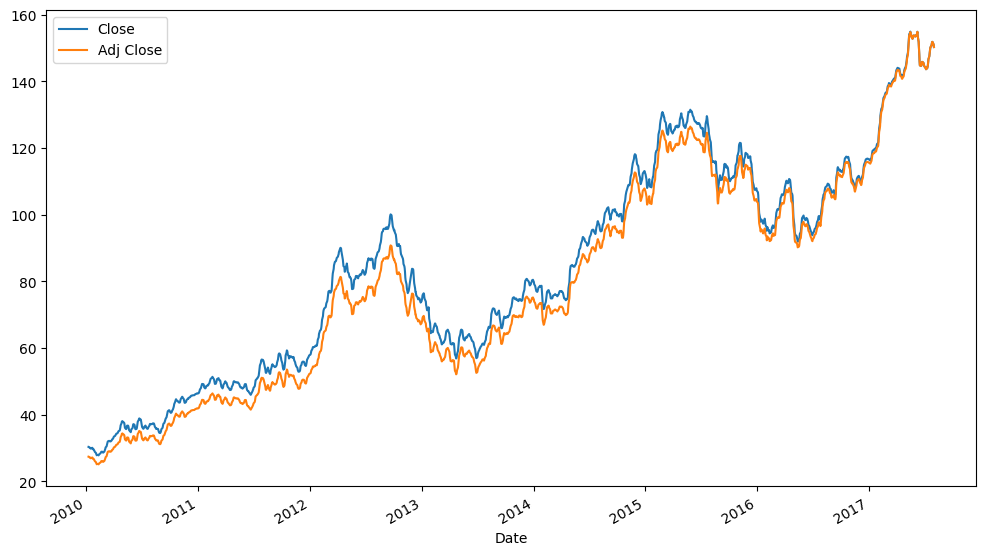

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

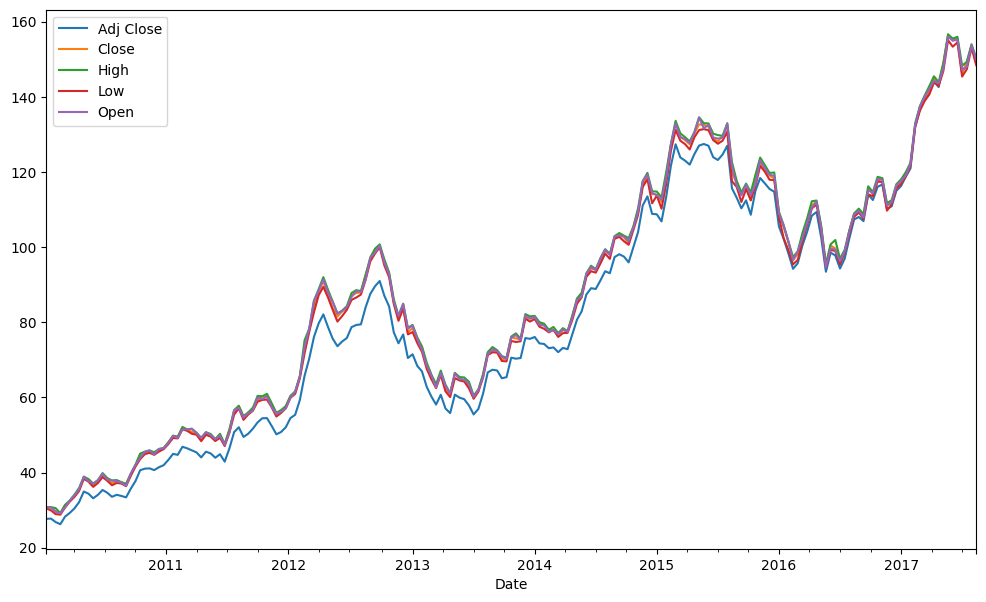

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

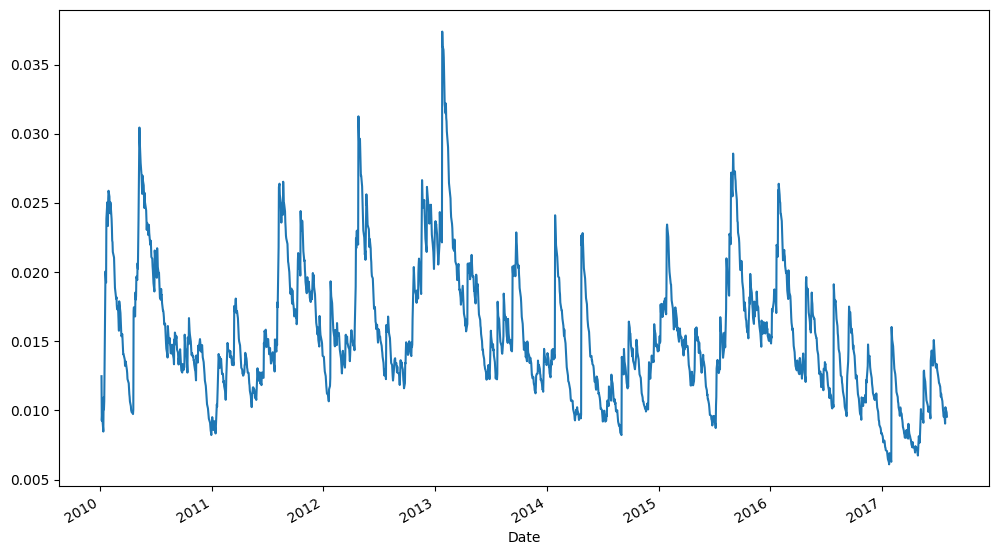

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [15]:

from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )


In [16]:
#from demos.avocados.py import read_avocadata

avocados = read_avocadata('2020', '2024')
avocados.head()

ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

**My owm example 34**

##Computadores Para Educar

In [23]:
#Importando el dataset
import requests
import pandas as pd

a = requests.get('https://www.datos.gov.co/resource/pyqj-s96k.json')
Data = a.json()
data_frame = pd.DataFrame(Data)
display(data_frame)

,anio,coddane,pc_entregados_mintic,tabletas_mintic_estudiantes,tabletas_mintic_docentes,pc_mintic_docentes,retoma_de_pc,docentes_formados,padres_capacitados,tabletas_aportadas_por_et,...,meta_terminales_entregadas,meta_docentes_formados,meta_padres_capacitados,meta_retoma_de_pc,vigencia,demanufactura_toneladas,meta_demanufactura,docentes_acompa_ados,meta_docentes_acompa_ados,sedes_beneficiadas
0,2020,15837,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
1,2020,41551,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
2,2020,15667,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
3,2020,05649,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
4,2020,15531,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020,23182,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
996,2020,13780,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
997,2020,73675,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
998,2020,41349,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"


In [24]:
data_frame.dtypes

,0
anio,object
coddane,object
pc_entregados_mintic,object
tabletas_mintic_estudiantes,object
tabletas_mintic_docentes,object
pc_mintic_docentes,object
retoma_de_pc,object
docentes_formados,object
padres_capacitados,object
tabletas_aportadas_por_et,object


In [30]:
#Datos de antioquia
computadores= data_frame.loc[data_frame['departamento'] == 'ANTIOQUIA']
display(computadores)

,anio,coddane,pc_entregados_mintic,tabletas_mintic_estudiantes,tabletas_mintic_docentes,pc_mintic_docentes,retoma_de_pc,docentes_formados,padres_capacitados,tabletas_aportadas_por_et,...,meta_terminales_entregadas,meta_docentes_formados,meta_padres_capacitados,meta_retoma_de_pc,vigencia,demanufactura_toneladas,meta_demanufactura,docentes_acompa_ados,meta_docentes_acompa_ados,sedes_beneficiadas
3,2020,05649,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
8,2020,05585,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
12,2020,05809,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
17,2020,05425,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
31,2020,05101,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2020,05051,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
983,2020,05284,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
988,2020,05400,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"
990,2020,05652,0,0,0,0,0,0,",00",0,...,"77427,00","5000,00",",00","15000,00",2020-12-31,"3,55","190,00",",00","5000,00",",00"


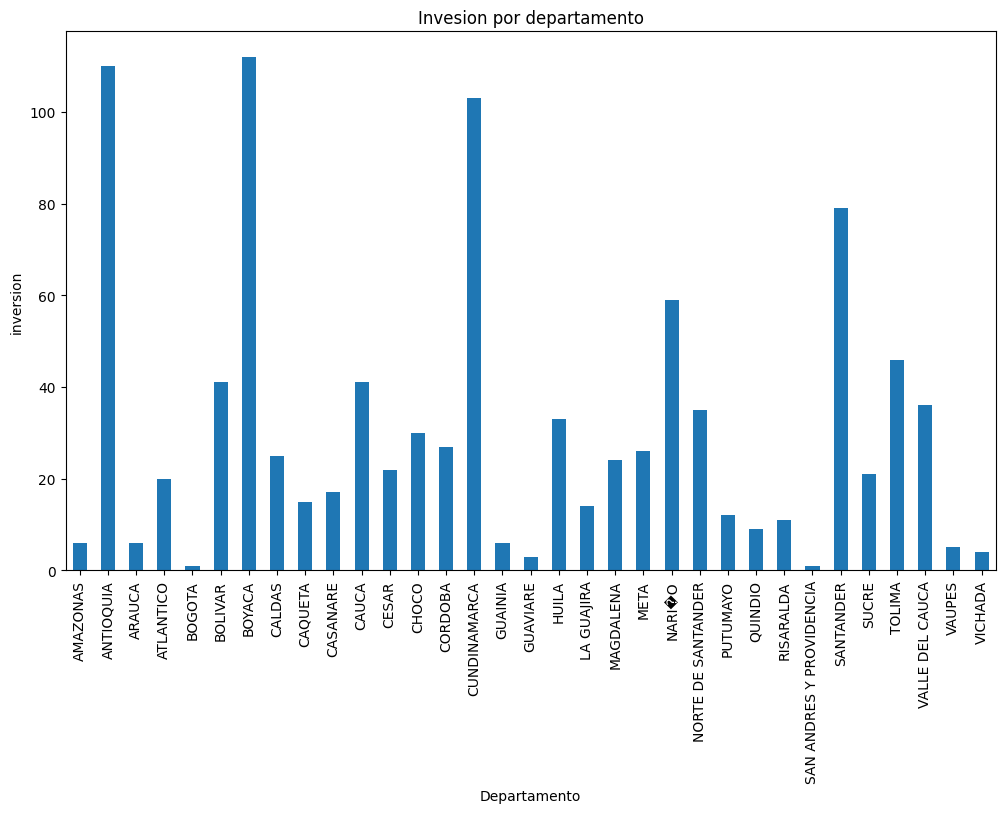

In [38]:
#Grafica tipo barras con la inversion por departamento
import matplotlib.pyplot as plt
inv = data_frame.groupby('departamento')['inversi_n'].count()
inv.plot(kind='bar')
plt.title('Invesion por departamento')
plt.xlabel('Departamento')
plt.ylabel('inversion')
plt.show()

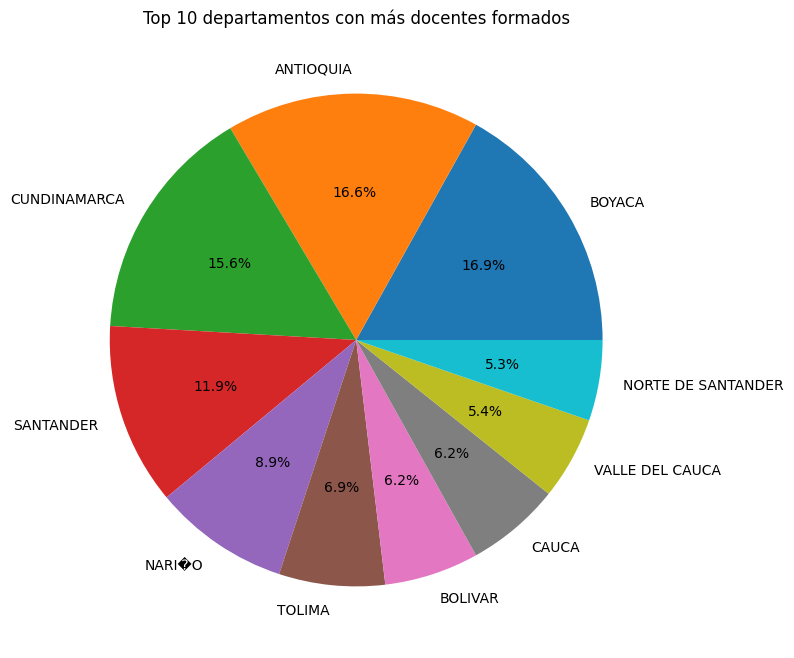

In [42]:
doc = data_frame.groupby('departamento')['docentes_formados'].count()
top_10 = doc.sort_values(ascending=False).head(10)

top_10.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Top 10 departamentos con más docentes formados')
plt.ylabel('')
plt.show()



# Thanks!